# 1. Tải và Làm sạch dữ liệu

1.1 Tải và hiển thị dữ liệu

In [1]:
import pandas as pd
f = pd.ExcelFile('C:/Users/DELL/OneDrive/Tài liệu/Study/Market Basket Analysis/Assignment-1_Data.xlsx')
df = pd.read_excel(f)

In [2]:
#In 5 dòng đầu df
print(df.head())

   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  United Kingdom  
3   3.39     17850.0  United Kingdom  
4   3.39     17850.0  United Kingdom  


1.2 Làm sạch dữ liệu

In [3]:
#Liệt kê các giá trị trống
df.isnull().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

In [4]:
#Loại bỏ dữ liệu có số lượng âm hoặc bằng 0 (Ko có giá trị phân tích)
df=df.loc[df['Quantity']>0]

In [5]:
#Loại bỏ dữ liệu có giá âm hoặc bằng 0
df=df.loc[df['Price']>0]

In [6]:
#Loại bỏ những dữ liệu không phải sản phẩm
df=df.loc[(df['Itemname']!='POSTAGE')&(df['Itemname']!='DOTCOM POSTAGE')&(df['Itemname']!='Adjust bad debt')&(df['Itemname']!='Manual')]

In [7]:
#Điền dữ liệu null
df=df.fillna('-')
#Check lại còn giá trị null hay không:
df.isnull().sum()

BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

1.3 Tạo thêm cột dữ liệu

In [8]:
# Chuyển cột 'Date' sang kiểu datetime
df['Date'] = pd.to_datetime(df['Date'])

# Tạo cột 'Year' từ cột 'Date'
df['Year'] = df['Date'].dt.year

# Tạo cột 'Month' từ cột 'Date'
df['Month'] = df['Date'].dt.month

In [9]:
#Tạo cột Total Price
df['Total price']=df.Quantity*df.Price

In [10]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Total price
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34


In [11]:
#Tính total price trong mỗi tháng
df.groupby(['Year','Month'])['Total price'].sum()

Year  Month
2010  12        778386.780
2011  1         648311.120
      2         490058.230
      3         659979.660
      4         507366.971
      5         721789.800
      6         710158.020
      7         642528.481
      8         701411.420
      9         981408.102
      10       1072317.070
      11       1421055.630
      12        606953.650
Name: Total price, dtype: float64

# 2. Phân tích dữ liệu thăm dò

2.1 Phân tích theo thời gian

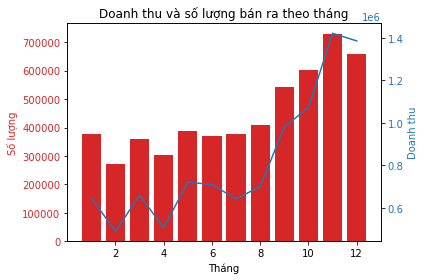

In [12]:
#Biểu đồ kết hợp thể hiện doanh thu và số lượng sản phẩm bán ra theo tháng
import matplotlib.pyplot as plt

Sl = df.groupby('Month')['Quantity'].sum()
Dt = df.groupby('Month')['Total price'].sum()

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Số lượng', color=color)
ax1.bar(Sl.index, Sl, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Doanh thu', color=color)
ax2.plot(Dt.index, Dt, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Doanh thu và số lượng bán ra theo tháng')

fig.tight_layout()  
plt.show()

Nhận xét: Do số lượng sản phẩm bán ra tỷ lệ thuận với doanh thu nên nhìn chung, tháng 11 có kết quả kinh doanh cao nhất. Các sản phẩm được bán ra nhiều hơn vào 4 tháng cuối năm

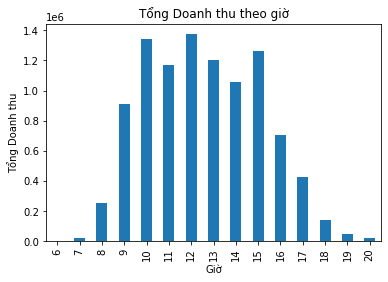

In [13]:
#Biểu đồ cột thể hiện doanh thu theo giờ
df['Hour'] = df['Date'].dt.hour

# Tính tổng doanh thu theo giờ
doanh_thu_theo_gio = df.groupby('Hour')['Total price'].sum()

# Vẽ biểu đồ cột doanh thu theo giờ
doanh_thu_theo_gio.plot(kind='bar', xlabel='Giờ', ylabel='Tổng Doanh thu', title='Tổng Doanh thu theo giờ')
plt.show()

Nhận xét: Dựa vào biểu đồ trên, doanh nghiệp có thể tìm ra xu hướng các khung giờ khách hàng thường xuyên mua sắm (10-15h) để đưa ra các chiến lược tiếp thị phù hợp

2.2 Phân tích theo quốc gia

In [14]:
# Nhóm dữ liệu theo quốc gia và tính tổng doanh thu cho mỗi quốc gia
df_country_revenue = df.groupby('Country')['Total price'].sum().reset_index()

# Sắp xếp theo doanh thu giảm dần và lấy top 10 quốc gia
df_top_10 = df_country_revenue.nlargest(10, 'Total price')

# Hiển thị DataFrame top 10 quốc gia theo doanh thu
print(df_top_10)

           Country  Total price
28  United Kingdom  8763711.614
16     Netherlands   283889.340
6          Germany   205569.890
5           France   184768.740
0        Australia   138171.310
23           Spain    55725.110
25     Switzerland    53087.900
12           Japan    37416.370
3          Belgium    36927.340
24          Sweden    36839.330


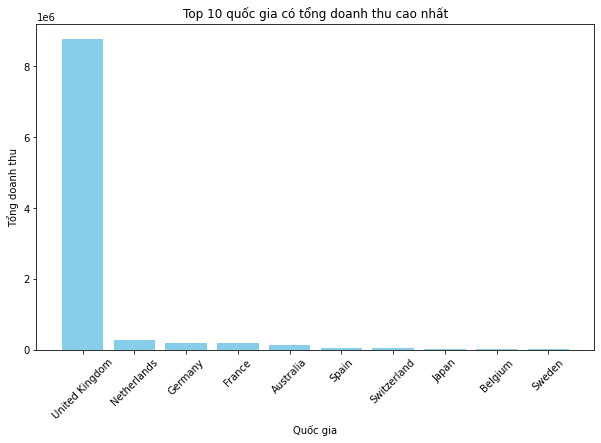

In [15]:
#Biểu đồ cột thể hiện tổng doanh thu của Top 10 quốc gia có doanh thu cao nhất
plt.figure(figsize=(10, 6))
plt.bar(df_top_10['Country'], df_top_10['Total price'], color='skyblue')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng doanh thu')
plt.title('Top 10 quốc gia có tổng doanh thu cao nhất')
plt.xticks(rotation=45)
plt.show()

Nhận xét: Vương quốc Anh là quốc gia có doanh thu cao nhất, chênh lệch rất nhiều với quốc gia thứ 2 là Hà Lan. Doanh nghiệp có thể tập trung đẩy mạnh phát triển ở thị trường này, hoặc nghiên cứu các vấn đề ở những thị trường có doanh thu kém hơn nếu muốn mở rộng thị trường

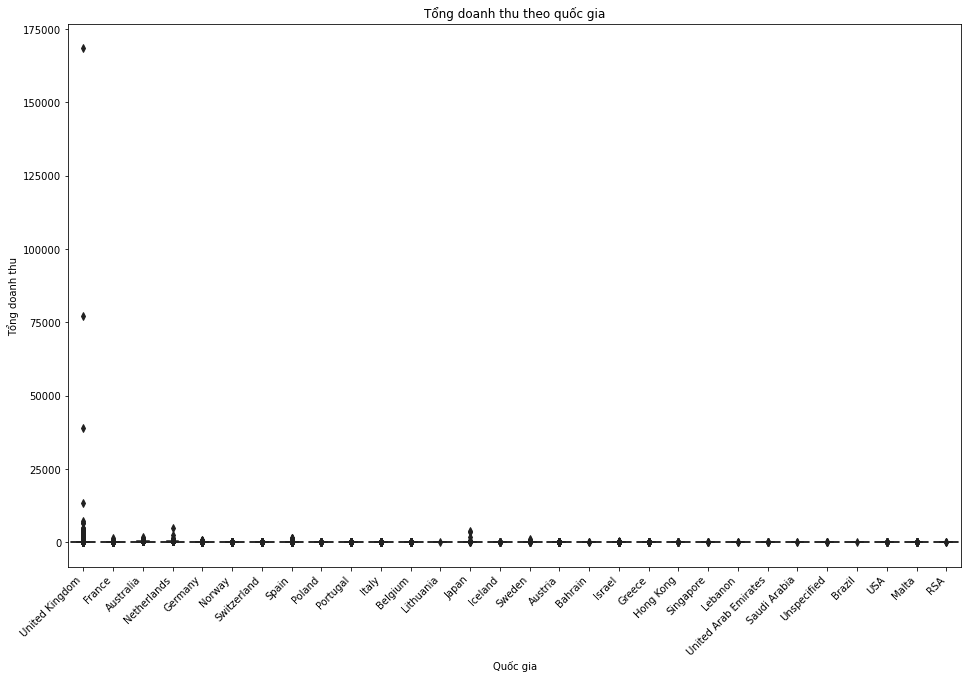

In [16]:
#Biểu đồ Box plot thể hiện tổng doanh thu theo quốc gia
import seaborn as sns
plt.figure(figsize=(16,10))
sns.boxplot(x='Country', y='Total price', data=df, palette='viridis')
plt.title('Tổng doanh thu theo quốc gia')
plt.xlabel('Quốc gia')
plt.ylabel('Tổng doanh thu')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_4212\2072077323.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


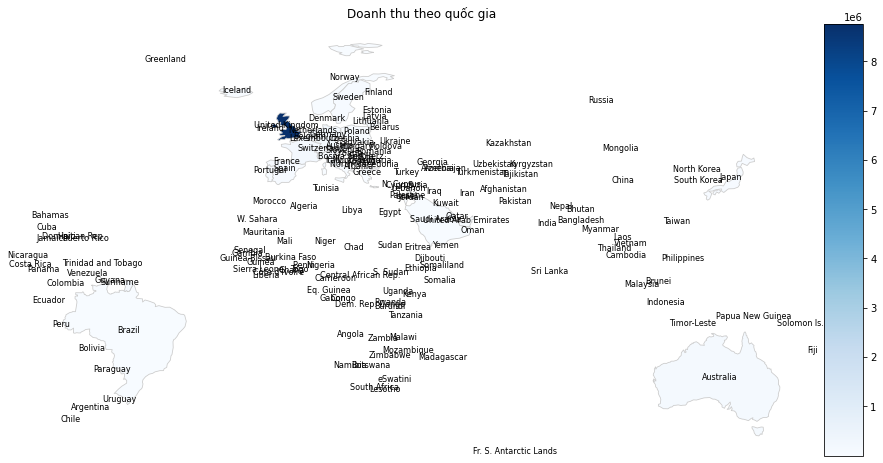

In [17]:
#Biểu đồ địa lý 
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Đọc dữ liệu bản đồ thế giới
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Tạo dữ liệu giả định để thay thế revenue_by_country
revenue_by_country = df.groupby('Country')['Total price'].sum().reset_index()

# Gộp dữ liệu từ DataFrame của bạn với dữ liệu bản đồ thế giới
merged = world.set_index('name').join(revenue_by_country.set_index('Country'))

# Vẽ biểu đồ
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged.plot(column='Total price', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax)
# Bổ sung chú thích cho từng quốc gia
for idx, row in merged.iterrows():
    ax.annotate(text=row.name, xy=(row.geometry.centroid.x, row.geometry.centroid.y), horizontalalignment='center', fontsize=8, color='Black')

ax.set_title('Doanh thu theo quốc gia')
ax.set_axis_off()

plt.show()

2.3 Phân tích theo sản phẩm

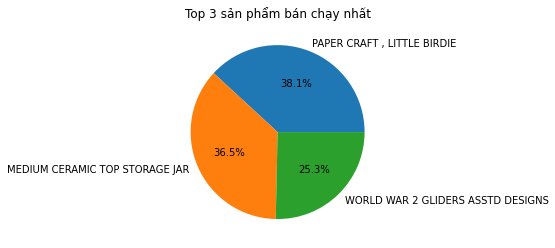

In [18]:
#Biểu đồ tròn top 3 sản phẩm bán chạy nhất
top_3_san_pham = df.groupby('Itemname')['Quantity'].sum().nlargest(3)
top_3_san_pham.plot(kind='pie', autopct='%1.1f%%', title='Top 3 sản phẩm bán chạy nhất')
plt.ylabel('')
plt.show()

2.4 Phân tích khách hàng

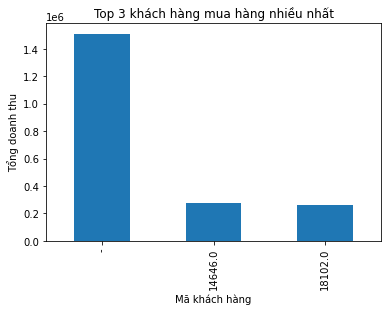

In [19]:
#Biểu đồ top 3 khách hàng mang lại doanh thu cao nhất
top_3_khach_hang = df.groupby('CustomerID')['Total price'].sum().nlargest(3)
top_3_khach_hang.plot(kind='bar', xlabel='Mã khách hàng', ylabel='Tổng doanh thu', title='Top 3 khách hàng mua hàng nhiều nhất')
plt.show()

Nhận xét: Doanh nghiệp có thể đưa ra các chương trình tri ân cho các khách hàng mang lại doanh thu cao nhất

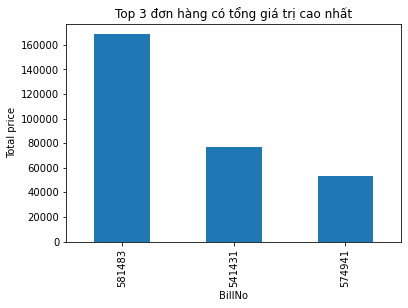

In [20]:
#Biểu đồ top 3 đơn hàng có tổng giá trị cao nhất
top_3_don_hang = df.groupby('BillNo')['Total price'].sum().nlargest(3)
top_3_don_hang.plot(kind='bar', xlabel='BillNo', ylabel='Total price', title='Top 3 đơn hàng có tổng giá trị cao nhất')
plt.show()

# 3. Thuật toán Apriori và FP-Growth

3.1 Apriori

In [21]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [22]:
df1 = df[['BillNo', 'Itemname']]

In [23]:
from collections import defaultdict
# Khởi tạo một từ điển có giá trị mặc định là list
grouped_data = defaultdict(list)

# Lặp qua dữ liệu và nhóm các mục theo giá trị của cột "TTD"
for ttd, item in zip(df1["BillNo"], df1["Itemname"]):
    grouped_data[ttd].append(item)

# Chuyển đổi từ điển thành dạng bạn mong muốn
formatted_data = {"BillNo": [], "Itemname": []}
for ttd, items in grouped_data.items():
    formatted_data["BillNo"].append(ttd)
    formatted_data["Itemname"].append(items)

In [24]:
# Chuyển đổi dữ liệu thành dạng danh sách các giao dịch
transactions = formatted_data["Itemname"]

# Khởi tạo encoder
encoder = TransactionEncoder()

# Fit và chuyển đổi dữ liệu thành dạng ma trận one-hot encoding
onehot = encoder.fit_transform(transactions)

# Tạo DataFrame từ ma trận one-hot encoding
df2 = pd.DataFrame(onehot, columns=encoder.columns_)

In [25]:
df2.head(10)

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
# Tìm tập phổ biến với max_len=3
frequent_itemsetsap = apriori(df2, min_support=0.03, max_len=3, use_colnames=True)

In [35]:
# In ra tập phổ biến
#frequent_itemsets.head(70)
print(frequent_itemsetsap)

      support                                           itemsets
0    0.048557                           (6 RIBBONS RUSTIC CHARM)
1    0.030928                  (60 CAKE CASES VINTAGE CHRISTMAS)
2    0.041134                      (60 TEATIME FAIRY CAKE CASES)
3    0.030515                   (72 SWEETHEART FAIRY CAKE CASES)
4    0.049845                       (ALARM CLOCK BAKELIKE GREEN)
..        ...                                                ...
133  0.042216  (JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA...
134  0.034845  (JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...
135  0.037165  (JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)
136  0.032577  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...
137  0.030567  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...

[138 rows x 2 columns]


In [36]:
# Tìm các quy tắc kết hợp
rules = association_rules(frequent_itemsetsap, metric="lift", min_threshold=1)

# In ra các quy tắc kết hợp và các chỉ số
print(rules)

                            antecedents                          consequents  \
0            (ALARM CLOCK BAKELIKE RED)         (ALARM CLOCK BAKELIKE GREEN)   
1          (ALARM CLOCK BAKELIKE GREEN)           (ALARM CLOCK BAKELIKE RED)   
2      (PINK REGENCY TEACUP AND SAUCER)    (GREEN REGENCY TEACUP AND SAUCER)   
3     (GREEN REGENCY TEACUP AND SAUCER)     (PINK REGENCY TEACUP AND SAUCER)   
4     (GREEN REGENCY TEACUP AND SAUCER)    (ROSES REGENCY TEACUP AND SAUCER)   
5     (ROSES REGENCY TEACUP AND SAUCER)    (GREEN REGENCY TEACUP AND SAUCER)   
6             (JUMBO BAG RED RETROSPOT)            (JUMBO BAG PINK POLKADOT)   
7             (JUMBO BAG PINK POLKADOT)            (JUMBO BAG RED RETROSPOT)   
8             (JUMBO BAG RED RETROSPOT)  (JUMBO SHOPPER VINTAGE RED PAISLEY)   
9   (JUMBO SHOPPER VINTAGE RED PAISLEY)            (JUMBO BAG RED RETROSPOT)   
10            (JUMBO BAG RED RETROSPOT)             (JUMBO STORAGE BAG SUKI)   
11             (JUMBO STORAGE BAG SUKI) 

3.2 FP-Growth

In [39]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth


# Chuẩn bị dữ liệu thành danh sách giao dịch
transactions = df.groupby('BillNo')['Itemname'].apply(list).values.tolist()

# Sử dụng TransactionEncoder để chuyển đổi danh sách giao dịch thành dạng dữ liệu phù hợp cho FP-growth
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Áp dụng FP-Growth để tìm các mẫu phổ biến
frequent_itemsetsfp = fpgrowth(df_encoded, min_support=0.03, use_colnames=True)

# In các mẫu phổ biến
print(frequent_itemsetsfp)

      support                                           itemsets
0    0.113299               (WHITE HANGING HEART T-LIGHT HOLDER)
1    0.073763                    (ASSORTED COLOUR BIRD ORNAMENT)
2    0.039381                         (HOME BUILDING BLOCK WORD)
3    0.031907                         (LOVE BUILDING BLOCK WORD)
4    0.056082                         (JAM MAKING SET WITH JARS)
..        ...                                                ...
133  0.034845  (JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG...
134  0.030567  (LUNCH BAG PINK POLKADOT, LUNCH BAG RED RETROS...
135  0.032577  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...
136  0.037629  (GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...
137  0.031134  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...

[138 rows x 2 columns]


In [40]:
# Tìm các quy tắc kết hợp
rulesfp = association_rules(frequent_itemsetsfp, metric="lift", min_threshold=1)

# In ra các quy tắc kết hợp và các chỉ số
print(rulesfp)

                            antecedents                          consequents  \
0            (ALARM CLOCK BAKELIKE RED)         (ALARM CLOCK BAKELIKE GREEN)   
1          (ALARM CLOCK BAKELIKE GREEN)           (ALARM CLOCK BAKELIKE RED)   
2             (JUMBO BAG RED RETROSPOT)            (JUMBO BAG PINK POLKADOT)   
3             (JUMBO BAG PINK POLKADOT)            (JUMBO BAG RED RETROSPOT)   
4             (JUMBO BAG RED RETROSPOT)             (JUMBO STORAGE BAG SUKI)   
5              (JUMBO STORAGE BAG SUKI)            (JUMBO BAG RED RETROSPOT)   
6             (JUMBO BAG RED RETROSPOT)  (JUMBO SHOPPER VINTAGE RED PAISLEY)   
7   (JUMBO SHOPPER VINTAGE RED PAISLEY)            (JUMBO BAG RED RETROSPOT)   
8             (LUNCH BAG PINK POLKADOT)            (LUNCH BAG RED RETROSPOT)   
9             (LUNCH BAG RED RETROSPOT)            (LUNCH BAG PINK POLKADOT)   
10            (LUNCH BAG RED RETROSPOT)            (LUNCH BAG  BLACK SKULL.)   
11            (LUNCH BAG  BLACK SKULL.) 